In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels)=cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
from keras.utils import to_categorical
print("Shape of Training:", train_images.shape, train_labels.shape)
print("Shape of Testing data:", test_images.shape, test_labels.shape)

Shape of Training: (50000, 32, 32, 3) (50000, 1)
Shape of Testing data: (10000, 32, 32, 3) (10000, 1)


Finding the unique elements from the training Models

In [ ]:
classes = np.unique(train_labels)
no_of_classes = len(classes)
print('Total number of outputs:',no_of_classes)
print("Output Classes:",classes)

Total number of outputs: 10
Output Classes: [0 1 2 3 4 5 6 7 8 9]


Find the shape of input images and create the variable input_shape

In [ ]:
no_of_cols,no_of_rows,no_of_dims = train_images.shape[1:]

training_Data = train_images.reshape(train_images.shape[0], no_of_rows, no_of_cols, no_of_dims)
testing_Data = test_images.reshape(test_images.shape[0], no_of_rows, no_of_cols, no_of_dims)
input_shape = (no_of_rows, no_of_cols, no_of_dims)

In [ ]:
#change the datatype to float
training_Data = training_Data.astype('float32')
testing_Data = testing_Data.astype('float32')

#scale the data to lie between 0 to 1
training_Data /= 255
testing_Data /= 255

#change the labels from integer to categorical data
train_Labels = to_categorical(train_labels)
test_Labels = to_categorical(test_labels)

In [ ]:
#Display the change for category label using one-hot encoding
print("Original label 0:", train_labels[0])
print("On conversion to categorical (one-hot):",train_labels[0])

Original label 0: [6]
On conversion to categorical (one-hot): [6]


In [ ]:
def createModel():
  model=Sequential()

  #the first 2 layers with 32 filters of window size 3x3
  model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
  model.add(Conv2D(64,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
  model.add(Conv2D(64,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(no_of_classes, activation="softmax"))
  return model

In [ ]:
model_one=createModel()
batch_size=3
epochs=3
model_one.compile(optimizer='rmsprop',loss="categorical_crossentropy",metrics=['accuracy'])

model_one.summary()
history= model_one.fit(training_Data,train_Labels,batch_size=batch_size, epochs=epochs,
                      verbose=1, validation_data=(testing_Data,test_Labels))
model_one.evaluate(testing_Data,test_Labels)
model_one.predict(testing_Data)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

array([[8.97450671e-02, 7.82300159e-02, 1.02347031e-01, ...,
        1.14178546e-01, 9.66515839e-02, 9.90992412e-02],
       [5.68302758e-02, 8.83854739e-03, 4.62269329e-13, ...,
        3.75147107e-16, 9.32754457e-01, 1.57675904e-03],
       [9.97781381e-02, 8.84323940e-02, 9.86984894e-02, ...,
        1.07252218e-01, 1.09646000e-01, 1.10777989e-01],
       ...,
       [8.97450671e-02, 7.82300159e-02, 1.02347031e-01, ...,
        1.14178546e-01, 9.66515839e-02, 9.90992412e-02],
       [8.97450671e-02, 7.82300159e-02, 1.02347031e-01, ...,
        1.14178546e-01, 9.66515839e-02, 9.90992412e-02],
       [8.97450671e-02, 7.82300159e-02, 1.02347031e-01, ...,
        1.14178546e-01, 9.66515839e-02, 9.90992412e-02]], dtype=float32)

Text(0.5, 1.0, 'Loss Curve')

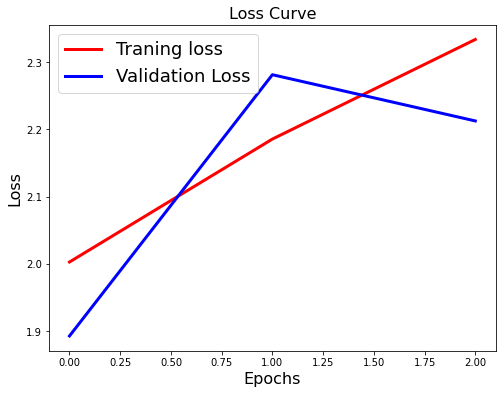

In [ ]:
#loss curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Traning loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curve', fontsize=16)

Text(0.5, 1.0, 'Accuarcy Curve')

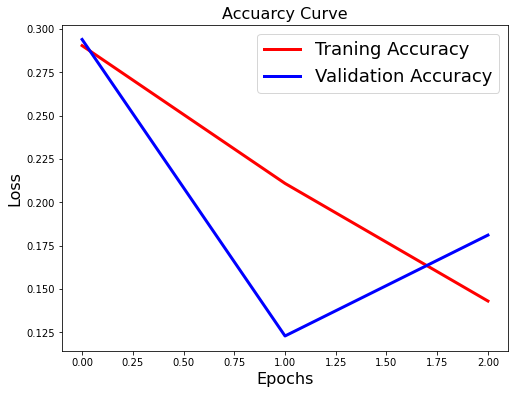

In [ ]:
#accuracy curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Traning Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Accuarcy Curve',fontsize=16)